In [140]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [141]:
import logging
import pypsa
import os.path

import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import pandas as pd
import sys

In [142]:
# running the jupyter notebook on the compute nodes doesnt build the path as expected, you have to manually do this
import IPython

working_directory = os.path.dirname(IPython.extract_module_locals()[1]['__vsc_ipynb_file__'])
os.chdir(working_directory)


In [143]:

# from make_summary import assign_carriers
from _helpers import configure_logging, mock_snakemake
from constants import PLOT_COST_UNITS, PLOT_CAP_UNITS,PLOT_SUPPLY_UNITS

logger = logging.getLogger(__name__)


In [144]:
PLANNING_YEAR = 2060
snakemake = mock_snakemake(
    "plot_network",
    snakefile_path=os.path.abspath("../"),
    topology="current+FCG",
    pathway="exp175",
    planning_horizons=PLANNING_YEAR,
    heating_demand="positive",
)

configure_logging(snakemake, logger=logger)
config = snakemake.config
tech_colors = config["plotting"]["tech_colors"]


ntw_path = snakemake.input.network

# ntw_path = f"/home/ivanra/documents/PyPSA-China-PIK/results/version-0325.175.1H/postnetworks/positive/postnetwork-ll-current+Neighbor-exponential175-{PLANNING_YEAR}.nc"
# ntw_path = f"/home/ivanra/downloads/PaperResultsXiaowei_networks/postnetwork-ll-current+Neighbor-exponential175-{PLANNING_YEAR}.nc"
n = pypsa.Network(ntw_path)


2025-02-03 15:51:30,660 - _helpers.py - INFO - =========== NEW RUN ===========
2025-02-03 15:51:30,660 - _helpers.py - INFO - =========== NEW RUN ===========
2025-02-03 15:51:30,660 - _helpers.py - INFO - =========== NEW RUN ===========
2025-02-03 15:51:30,660 - _helpers.py - INFO - =========== NEW RUN ===========
INFO:__main__:=========== NEW RUN ===========
INFO:pypsa.io:Imported network ntwk_2060.nc has buses, carriers, generators, global_constraints, links, loads, storage_units, stores


# Plot maps

In [145]:
from _plot_utilities import fix_network_names_colors, determine_plottable
from plot_network import plot_cost_map, plot_map
fix_network_names_colors(n, config)
determine_plottable(n)

/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/_plot_utilities.py:134: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  n.carriers.color.fillna(NAN_COLOR, inplace=True)


### plot capex

/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/plot_network.py:179: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/plot_network.py:339: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


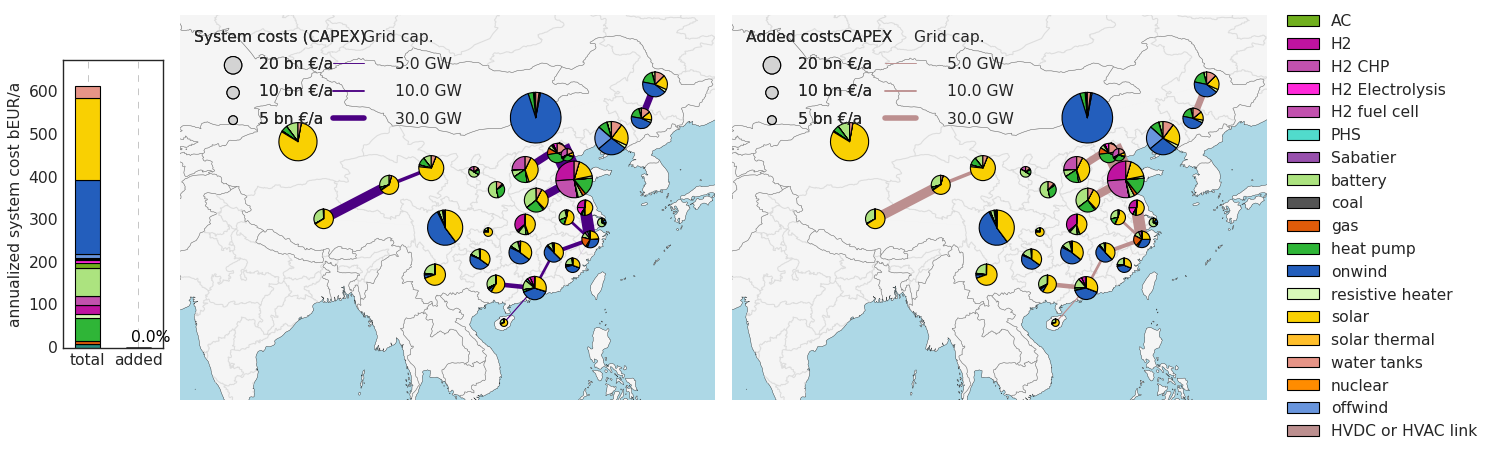

In [146]:
ax = plot_cost_map(n, int(PLANNING_YEAR), snakemake.config["costs"]["discountrate"], config["plotting"], cost_pannel=True, capex_only=True)

/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/plot_network.py:179: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/plot_network.py:339: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


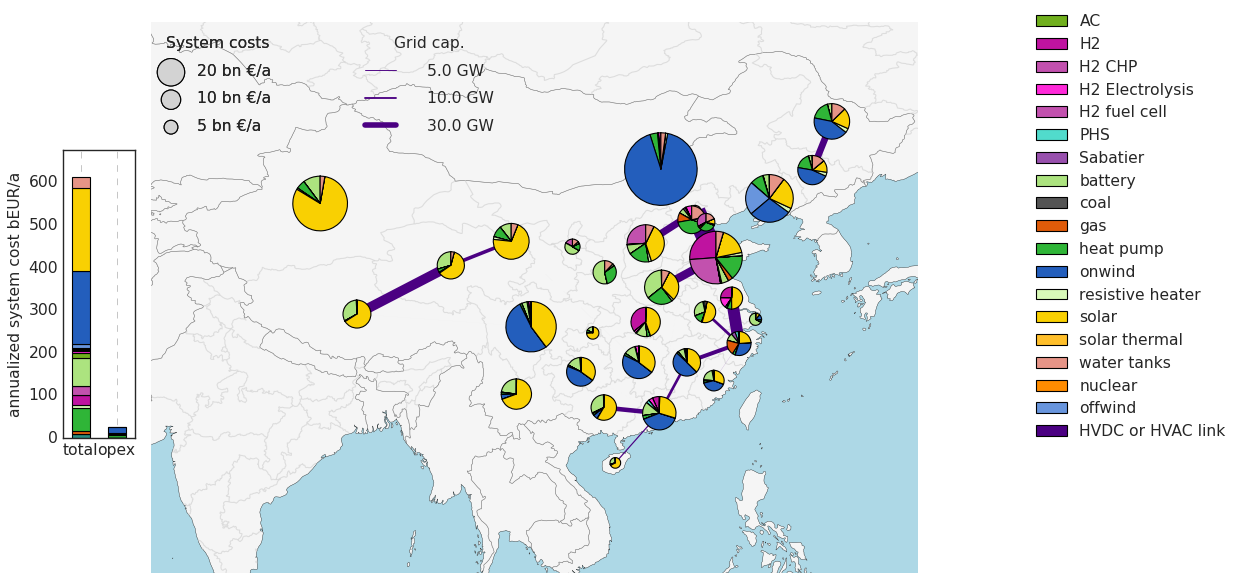

In [147]:
ax = plot_cost_map(n, int(PLANNING_YEAR), snakemake.config["costs"]["discountrate"], config["plotting"], cost_pannel=True, plot_additions=False, capex_only=False)

In [207]:
v_link = n.links[n.links.carrier=="AC"].copy()
v_link.index = v_link.apply(lambda row: row["bus0"]+"-"+row["bus1"]+" pos" if "positive" in row.name else row["bus1"]+"-"+row["bus0"]+" rev" , axis=1)
v_link.p_nom_opt.sort_index()

Anhui-Henan pos          1.882765e+00
Anhui-Henan rev          1.200795e+06
Anhui-Hubei pos          1.946378e+00
Anhui-Hubei rev          1.206707e+06
Anhui-Jiangsu pos        2.183017e+00
                             ...     
Shanghai-Zhejiang rev    1.217843e+06
Sichuan-Tibet pos        2.731822e+01
Sichuan-Tibet rev        1.200564e+06
Sichuan-Zhejiang pos     1.016822e+00
Sichuan-Zhejiang rev     1.271963e+06
Name: p_nom_opt, Length: 154, dtype: float64

In [206]:
h2_pip = n.links[n.links.carrier=="H2 pipeline"].copy()
h2_pip.index = h2_pip.apply(lambda row: row["bus0"]+"-"+row["bus1"]+" pos" if "positive" in row.name else row["bus1"]+"-"+row["bus0"]+" rev" , axis=1)
h2_pip.p_nom_opt.sort_index()

Anhui H2-Henan H2 pos          1.091054e+01
Anhui H2-Henan H2 rev          9.599442e+06
Anhui H2-Hubei H2 pos          8.045540e+00
Anhui H2-Hubei H2 rev          9.599441e+06
Anhui H2-Jiangsu H2 pos        1.746463e+01
                                   ...     
Shanghai H2-Zhejiang H2 rev    9.599616e+06
Sichuan H2-Tibet H2 pos        1.415213e+03
Sichuan H2-Tibet H2 rev        9.597940e+06
Sichuan H2-Zhejiang H2 pos     3.130031e+00
Sichuan H2-Zhejiang H2 rev     4.799609e+06
Name: p_nom_opt, Length: 154, dtype: float64

In [180]:
n.links[n.links.carrier=="AC"].p_nom_opt.sort_values(ascending=False)

Link
Xinjiang-Henan reversed           1.390438e+06
Shandong-Henan reversed           1.352641e+06
InnerMongolia-Jiangsu reversed    1.330301e+06
Gansu-Shaanxi reversed            1.297464e+06
Xinjiang-Gansu reversed           1.274755e+06
                                      ...     
Jiangsu-Sichuan positive          7.273037e-01
Gansu-Xinjiang positive           7.132001e-01
Shanghai-Sichuan positive         6.007519e-01
Henan-Xinjiang positive           4.076370e-01
Anhui-Xinjiang positive           3.442475e-01
Name: p_nom_opt, Length: 154, dtype: float64

## plot electricy generation map

/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/plot_network.py:494: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/plot_network.py:455: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


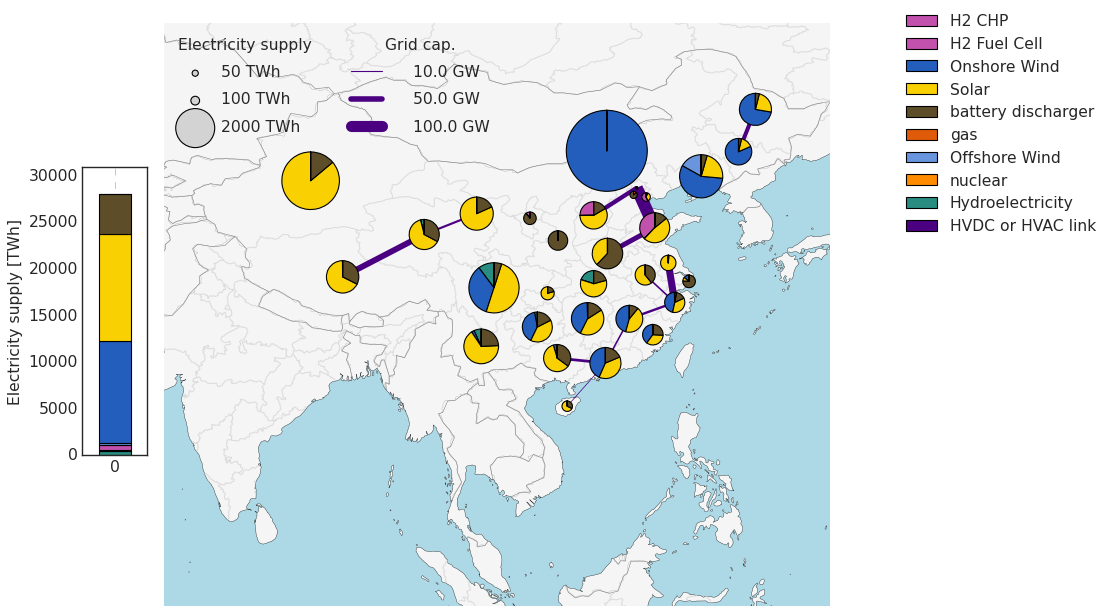

In [148]:
from plot_network import plot_energy_map
from _plot_utilities import set_plot_style
set_plot_style(
    style_config_file= os.path.abspath("../../config/plotting_styles/network_map.mplstyle"),
    #snakemake.config["plotting"]["network_style_config_file"],
    base_styles=["classic", "seaborn-v0_8-white"],
)
plot_energy_map(n,config["plotting"], carrier="AC", components = ["Generator", "Link"])

In [238]:
CARRIER = "heat"
es_loc = n.statistics.supply(groupby=["location", "carrier"], comps = ["Generator", "Link"], bus_carrier=CARRIER)
es_loc = es_loc.groupby(level=[1, 2]).sum()
es_loc=es_loc.to_frame().query('index.get_level_values(0) != ""').squeeze()
# # we miss some buses by grouping epr location, fill w 0s
bus_idx = pd.MultiIndex.from_product([n.buses.index, [CARRIER]])
es_loc = es_loc.reindex(bus_idx.union(es_loc.index), fill_value=0)
es_loc

Ahai station                    heat                   0.00000
Anhui                           H2 CHP             36215.67363
                                H2 Electrolysis    51801.19097
                                gas                 3929.34336
                                heat                   0.00000
                                                      ...     
Zhejiang central heat           heat                   0.00000
Zhejiang central water tanks    heat                   0.00000
Zhejiang decentral heat         heat                   0.00000
Zhejiang decentral water tanks  heat                   0.00000
Zhejiang gas                    heat                   0.00000
Name: 0, Length: 601, dtype: float64

In [237]:
energy_supply = n.statistics.supply(
    groupby=pypsa.statistics.get_bus_and_carrier,
    bus_carrier=CARRIER,
    comps=["Generator", "Link"],
)
# get rid of components
supply_pies = energy_supply.groupby(level=[1, 2]).sum()
supply_pies

bus       carrier           
Anhui     AC                    5.534370e+08
          H2 CHP                4.526959e+04
          H2 Fuel Cell          1.917753e+03
          Onshore Wind          5.415394e+03
          Solar                 2.268223e+08
                                    ...     
Zhejiang  Onshore Wind          1.728939e+08
          Solar                 1.320151e+08
          battery discharger    5.702337e+07
          gas                   1.078621e+07
          nuclear               1.499706e+04
Length: 243, dtype: float64

NameError: name 'make_nice_tech_colors' is not defined

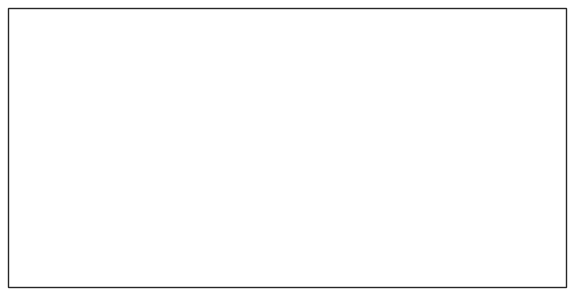

In [ ]:
from _plot_utilities import make_nice_tech_colors
opts = config["plotting"]
# get all carrier types
carriers_list = supply_pies.index.get_level_values(1).unique()
carriers_list = carriers_list.tolist()

# TODO make line handling nicer
line_lower_threshold = opts.get("min_edge_capacity", 500)
# Make figur
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()})
fig.set_size_inches(opts["energy_map"]["figsize"])
# get colors
bus_colors = n.carriers.loc[n.carriers.nice_name.isin(carriers_list), "color"]
bus_colors.rename(opts["nice_names"], inplace=True)

# Add the total costs
bus_size_factor = opts["energy_map"]["bus_size_factor"]
linewidth_factor = float(
    opts["energy_map"][f"linewidth_factor{"_heat" if carrier == 'heat' else ''}"]
)

preferred_order = pd.Index(opts["preferred_order"])
reordered = preferred_order.intersection(bus_colors.index).append(
    bus_colors.index.difference(preferred_order)
)
# TODO there'sa  problem with n colors when using heat, pies aren't grouped by location
colors = n.carriers.color.copy()
colors.index = colors.index.map(opts["nice_names"])
tech_colors = make_nice_tech_colors(opts["tech_colors"], opts["nice_names"])

# make sure plot isnt overpopulated
def calc_link_plot_width(row, carrier="AC"):
    if row.length == 0 or row.carrier != carrier or not row.plottable:
        return 0
    else:
        return row.p_nom_opt

edge_carrier = "H2" if carrier == "heat" else "AC"
link_plot_w = n.links.apply(lambda row: calc_link_plot_width(row, edge_carrier), axis=1)
edges = pd.concat([n.lines.s_nom_opt, link_plot_w])
edge_widths = edges.clip(line_lower_threshold, edges.max()).replace(line_lower_threshold, 0)

plot_map(
    n,
    tech_colors=tech_colors,  # colors.to_dict(),
    edge_widths=edge_widths / linewidth_factor,
    bus_colors=bus_colors.loc[reordered],
    bus_sizes=supply_pies / bus_size_factor,
    edge_colors=opts["energy_map"]["edge_color"],
    ax=ax,
    edge_unit_conv=PLOT_CAP_UNITS,
    bus_unit_conv=PLOT_SUPPLY_UNITS,
    add_legend=True,
    **opts["energy_map"],
)

/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/plot_network.py:431: FutureWarning: The behavior of array concatenation with empty entries is deprecated. In a future version, this will no longer exclude empty items when determining the result dtype. To retain the old behavior, exclude the empty entries before the concat operation.
  edges = pd.concat([network.lines.s_nom_opt, link_plot_w])
/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '
/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/plot_network.py:494: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()
/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/plot_network.py:455: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results mi

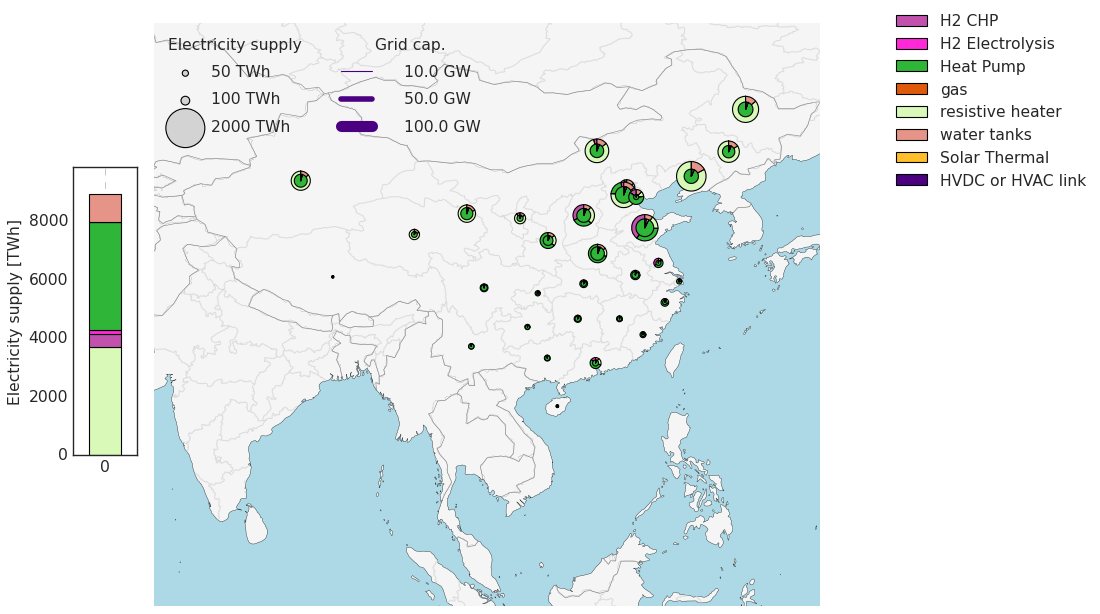

In [149]:
from plot_network import plot_energy_map
from _plot_utilities import set_plot_style
set_plot_style(
    style_config_file= os.path.abspath("../../config/plotting_styles/network_map.mplstyle"),
    #snakemake.config["plotting"]["network_style_config_file"],
    base_styles=["classic", "seaborn-v0_8-white"],
)
plot_energy_map(n,config["plotting"], carrier="heat", components = ["Generator", "Link"])

In [150]:
n.links[n.links.carrier=="H2"]["p_nom_opt"].sort_values(ascending=False)

Series([], Name: p_nom_opt, dtype: float64)

In [151]:
n.links[n.links.carrier=="AC"]["p_nom_opt"].sort_values()

Link
Anhui-Xinjiang positive           3.442475e-01
Henan-Xinjiang positive           4.076370e-01
Shanghai-Sichuan positive         6.007519e-01
Gansu-Xinjiang positive           7.132001e-01
Jiangsu-Sichuan positive          7.273037e-01
                                      ...     
Xinjiang-Gansu reversed           1.274755e+06
Gansu-Shaanxi reversed            1.297464e+06
InnerMongolia-Jiangsu reversed    1.330301e+06
Shandong-Henan reversed           1.352641e+06
Xinjiang-Henan reversed           1.390438e+06
Name: p_nom_opt, Length: 154, dtype: float64

/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


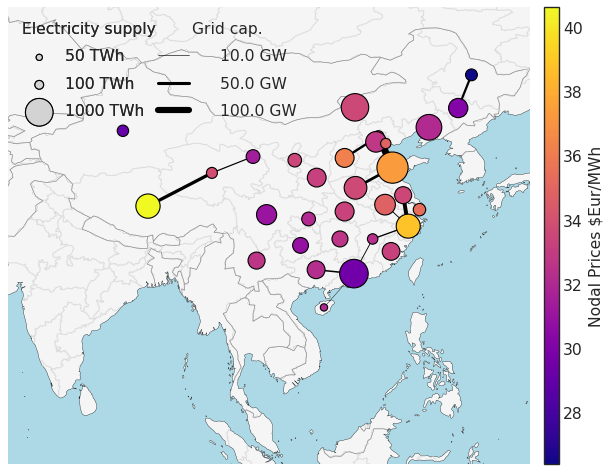

In [152]:
from plot_network import plot_nodal_prices

plot_nodal_prices(n, config["plotting"], "AC")

/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


<GeoAxes: >

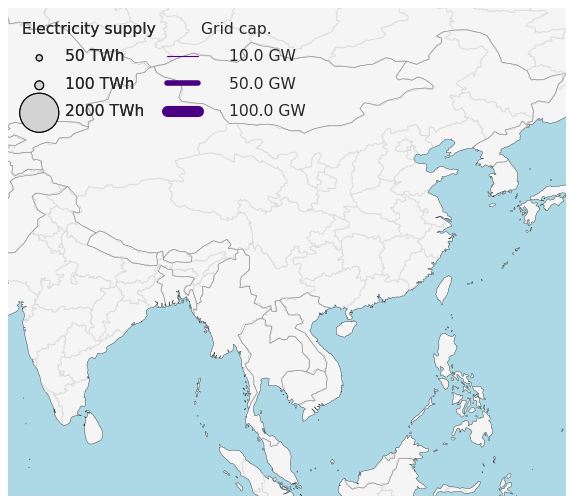

In [153]:
opts = snakemake.config["plotting"]
plot_h2_ntwk = n.copy()
carrier = "H2"


supply_pies = plot_h2_ntwk.statistics.supply(
        groupby=pypsa.statistics.get_bus_and_carrier, bus_carrier=carrier, comps=["Generator"]
    ).droplevel(0)
# avoid cluttering the plot
plot_h2_ntwk.buses.drop(plot_h2_ntwk.buses.index[plot_h2_ntwk.buses.carrier != carrier], inplace=True)
plot_h2_ntwk.links.drop(
    plot_h2_ntwk.links.index[plot_h2_ntwk.links.carrier != carrier],
    inplace=True,
)

# get all carrier types
carriers_list = supply_pies.index.get_level_values(1).unique()
carriers_list = carriers_list.tolist()

# TODO make line handling nicer
line_lower_threshold = 500.0
line_upper_threshold = 1e4
# Make figure
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()})
fig.set_size_inches(opts["energy_map"]["figsize"])
# get colors
bus_colors = plot_h2_ntwk.carriers.loc[plot_h2_ntwk.carriers.nice_name.isin(carriers_list), "color"]
bus_colors.rename(opts["nice_names"], inplace=True)
# Add the total costs
bus_size_factor = opts["energy_map"]["bus_size_factor"]/1e2
linewidth_factor = opts["energy_map"]["linewidth_factor"]*1e1
edges = pd.concat([plot_h2_ntwk.lines.s_nom_opt, plot_h2_ntwk.links.p_nom_opt])
edge_widths = (
    edges
    .clip(line_lower_threshold, edges.max())
    .replace(line_lower_threshold, 0)
)
preferred_order = pd.Index(opts["preferred_order"])
reordered = preferred_order.intersection(bus_colors.index).append(
    bus_colors.index.difference(preferred_order)
)

plot_map(
    plot_h2_ntwk,
    tech_colors=plot_h2_ntwk.carriers.color,
    edge_widths=edge_widths / linewidth_factor/100,
    bus_colors=bus_colors.loc[reordered],
    bus_sizes=supply_pies / 1,
    edge_colors="indigo",
    ax=ax,
    edge_unit_conv=PLOT_CAP_UNITS,
    bus_unit_conv=PLOT_SUPPLY_UNITS,
    add_legend=False,
    **opts["energy_map"],
)

In [154]:
nodal_prices = n.statistics.revenue( groupby=pypsa.statistics.get_bus_and_carrier_and_bus_carrier, comps="Load", bus_carrier="AC")/ n.statistics.supply(comps="Load", groupby=pypsa.statistics.get_bus_and_carrier_and_bus_carrier, bus_carrier="AC")*-1
nodal_prices = nodal_prices.droplevel(1).droplevel(1)
nodal_prices

bus
Anhui            inf
Beijing          inf
Chongqing        inf
Fujian           inf
Gansu            inf
Guangdong        inf
Guangxi          inf
Guizhou          inf
Hainan           inf
Hebei            inf
Heilongjiang     inf
Henan            inf
Hubei            inf
Hunan            inf
InnerMongolia    inf
Jiangsu          inf
Jiangxi          inf
Jilin            inf
Liaoning         inf
Ningxia          inf
Qinghai          inf
Shaanxi          inf
Shandong         inf
Shanghai         inf
Shanxi           inf
Sichuan          inf
Tianjin          inf
Tibet            inf
Xinjiang         inf
Yunnan           inf
Zhejiang         inf
Name: objective, dtype: float64

## plot capacity

## plot cost

### Plot nodal prices

## Interactive plot map

In [155]:

import numpy as np
# make names and link sizes, make sure we only plot AC, DC & statiosn
ac_links = n.links[n.links.carrier == "AC"]
colors = n.links.index.to_series().apply(lambda x: 'black' if 'ext' in x else 'pink')
widths = np.log(n.links.p_nom_opt + 3) / 2
widths[~widths.index.isin(ac_links.index)] = 0
widths[widths.index.str.contains('reversed')] = 0
names = n.links.copy()
names["name"] = names.index.values
names.loc[~names.index.isin(ac_links.index), "p_nom_opt"] = ""
names.loc[~names.index.isin(ac_links.index), "name"] = ""
buses = n.buses.copy()
buses["name"] = buses.apply(lambda x: f"{x.name}" if x.carrier == "AC" or x.carrier=="stations" else "", axis=1)
buses["sizes"] = buses.apply(lambda x:10 if x.carrier == "AC" or x.carrier=="stations" else 0, axis=1)
buses["colors"] = buses.apply(lambda x: "black" if x.carrier == "AC" else "red", axis=1)
buses.carrier.unique()
ax = n.iplot(link_colors=colors, link_widths=widths, link_text = names.p_nom_opt.astype(str) + names.name, bus_text=buses.name, bus_sizes=buses.sizes, bus_colors=buses.colors)

/p/tmp/ivanra/anaconda/ipykernel_589268/1096144582.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  names.loc[~names.index.isin(ac_links.index), "p_nom_opt"] = ""


### extendable lines

/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/cartopy/mpl/feature_artist.py:144: UserWarning: facecolor will have no effect as it has been defined as "never".
  warnings.warn('facecolor will have no effect as it has been '


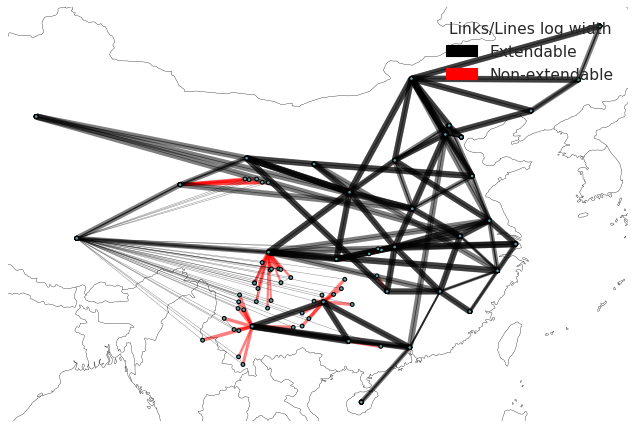

In [156]:

fig, ax = plt.subplots(1, 1, figsize=(10, 10),subplot_kw={"projection":ccrs.PlateCarree()})
def width(x):
    return np.log10(x/1e6).where(x>1,0)
n.plot(ax = ax,link_colors=n.links.p_nom_extendable.apply(lambda x: "red" if not x else "black"),line_colors=n.lines.s_nom_extendable.apply(lambda x: "red" if not x else "black"), link_widths= width(n.links.p_nom_opt) , line_widths=width(n.lines.s_nom_opt), link_alpha=0.5)
# Create custom legend
import matplotlib.patches as mpatches
extendable_patch = mpatches.Patch(color='black', label='Extendable')
non_extendable_patch = mpatches.Patch(color='red', label='Non-extendable')
ax.legend(handles=[extendable_patch, non_extendable_patch], title = "Links/Lines log width")

# Shadow prices & prices

In [157]:
from make_summary import make_summaries
summaries = make_summaries({("exp175-paper", PLANNING_YEAR):ntw_path})

INFO:make_summary:Make summary for scenario ('exp175-paper', 2060), using /p/tmp/ivanra/PyPSA-China-PIK/results/v-0.2.0_Debug_overnight_1hr_res/overnight_pthw-exp175_topo-current+FCG_proj-positive/postnetworks/ntwk_2060.nc


INFO:pypsa.io:Imported network ntwk_2060.nc has buses, carriers, generators, global_constraints, links, loads, storage_units, stores
/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/make_summary.py:436: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  .groupby(n.generators.loc[gens, "bus"], axis=1)
/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/make_summary.py:436: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  .groupby(n.generators.loc[gens, "bus"], axis=1)
/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/make_summary.py:436: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  .groupby(n.generators.loc[gens, "bus"], axis=1)
/p/tmp/ivanra/PyPSA-China-PIK/workflow/scripts/make_summary.py:443: RuntimeWarning: invalid value encountered in scalar divide
  market_values.at[tech, label] = revenue.sum().sum() / dispat

# CO2 emissions

In [158]:
n.global_constraints

,type,investment_period,carrier_attribute,sense,constant,mu
GlobalConstraint,,,,,,
co2_limit,primary_energy,NaN,co2_emissions,<=,0.0,-2416.359685


<Axes: xlabel='snapshot'>

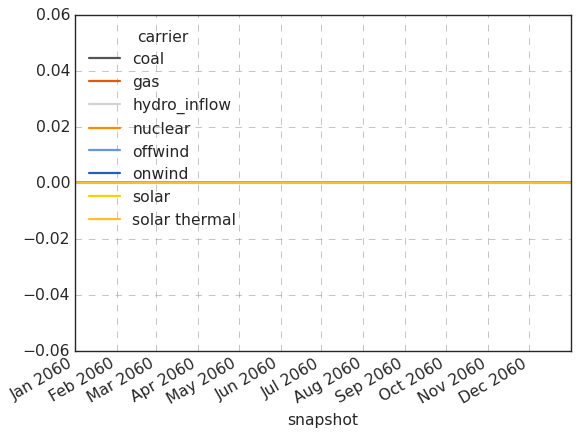

In [159]:
fig, ax = plt.subplots()
# calc the t resolved CO2 emissions from generators
time_res_emissions = ((n.generators_t.p/ n.generators.efficiency)* n.generators.carrier.map(n.carriers.co2_emissions)).T.groupby(n.generators.carrier).sum()
colors = time_res_emissions.T.columns.map(tech_colors).fillna("lightgrey")
time_res_emissions.T.plot(ax =ax, color =  colors, legend = True)

Text(0, 0.5, 'cum CO2 emissions [t]')

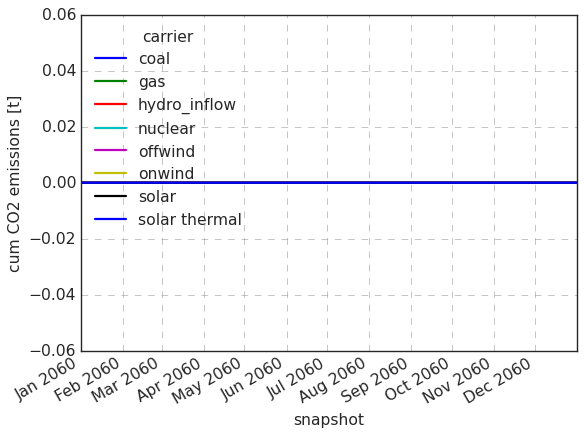

In [160]:
gen_emissions = ((n.generators_t.p/ n.generators.efficiency)* n.generators.carrier.map(n.carriers.co2_emissions)).T.groupby(n.generators.carrier).sum().T.cumsum()
fig, ax = plt.subplots()
gen_emissions.where(gen_emissions>=0).dropna(axis=1, how="all").plot(ax=ax)
ax.set_ylabel("cum CO2 emissions [t]")


Overnight model does not have CO2 capture or biomass stores, skipped


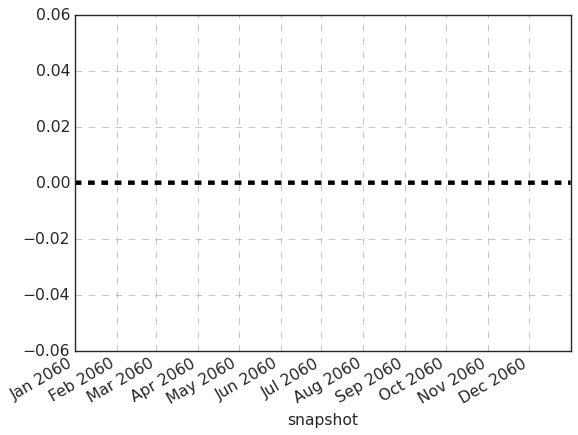

In [161]:
try:
    fig, ax = plt.subplots()
    # calc the t resolved CO2 emissions from generators
    ((n.generators_t.p/ n.generators.efficiency)* n.generators.carrier.map(n.carriers.co2_emissions)).T.groupby(n.generators.carrier).sum().sum().T.cumsum().plot(ax =ax, label = "CO2 emissions (cum)", lw=4, c ="black", ls = "--")
    n.stores_t.e.T.groupby(n.stores.carrier).sum().loc[["CO2","H2", "CO2 capture", "gas", "biomass"]].T.plot(lw=4, cmap ="jet", ax =ax)
    ax.legend()
    ax.semilogy()
    ax.set_ylim(1e3,1e10)
    ax.set_ylabel("carrier stock")
except KeyError:
    print("Overnight model does not have CO2 capture or biomass stores, skipped")

## CO2 capture
! beware the store is the difference :)

In [162]:
try:
    stores = n.stores_t.e.T.groupby(n.stores.carrier).sum()
    diff = stores.iloc[:, -1] -stores.iloc[:, 0]
    co2_cap = stores.iloc[:, -1].loc[["CO2 capture"]].sum()
    co2_cap
except KeyError:
    print("Overnight model does not have CO2 capture or biomass stores, skipped")


Overnight model does not have CO2 capture or biomass stores, skipped


<Axes: xlabel='snapshot'>

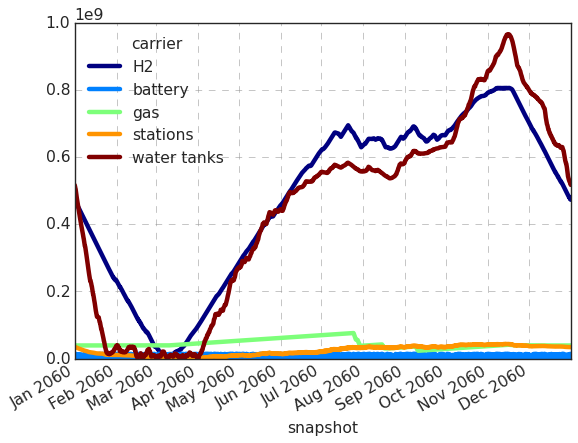

In [163]:
n.stores_t.e.T.groupby(n.stores.carrier).sum().T.plot(lw=4, cmap ="jet")

# plot time series

In [164]:
from plot_time_series import plot_energy_balance

KeyError: "['transmission losses'] not in index"

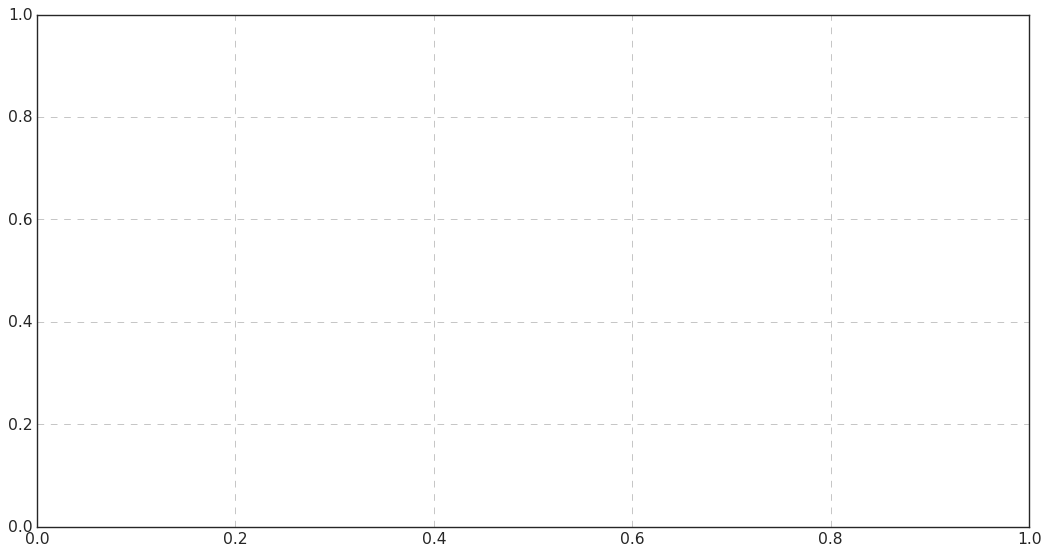

In [165]:
ax = plot_energy_balance(n, config["plotting"], start_date=f"{PLANNING_YEAR}-03-31 21:00", end_date=f"{PLANNING_YEAR}-04-06 12:00:00")
ax.grid(axis='y')
ax.set_title("Electricity Balance")

/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:1798: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, None)


Text(0.5, 1.0, 'Heat balance')

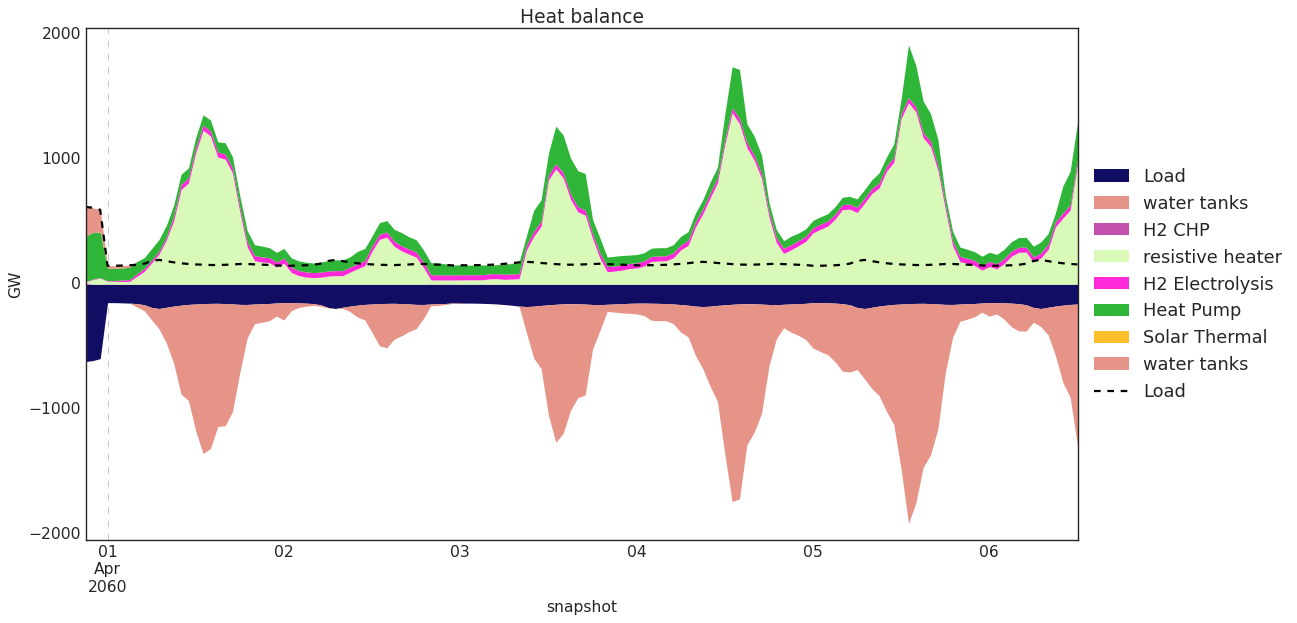

In [ ]:
ax = plot_energy_balance(n, config["plotting"], start_date=f"{PLANNING_YEAR}-03-31 21:00", end_date=f"{PLANNING_YEAR}-04-06 12:00:00", bus_carrier="heat")
ax.set_title("Heat balance")

/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:1798: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, None)


Text(0.5, 1.0, 'Electricity Balance')

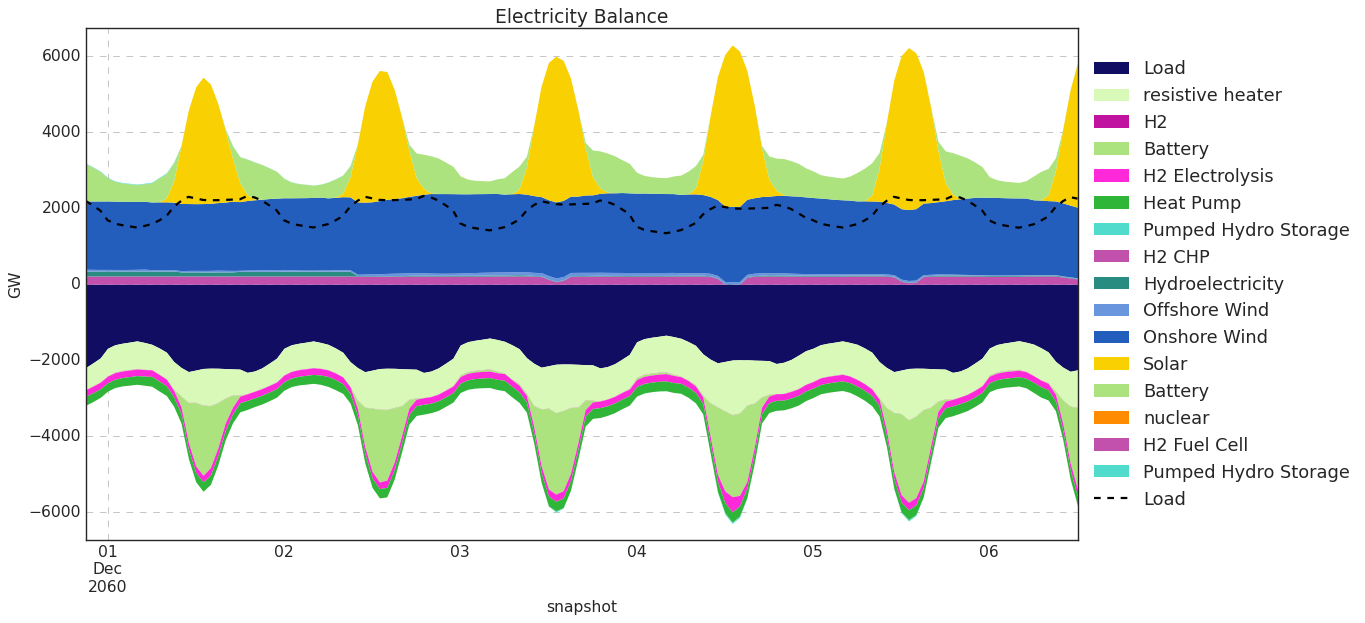

In [ ]:
ax = plot_energy_balance(n, config["plotting"], start_date=f"{PLANNING_YEAR}-11-30 21:00", end_date=f"{PLANNING_YEAR}-12-06 12:00:00")
ax.grid(axis='y')
ax.set_title("Electricity Balance")

/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:1798: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, None)


Text(0.5, 1.0, 'Heat balance')

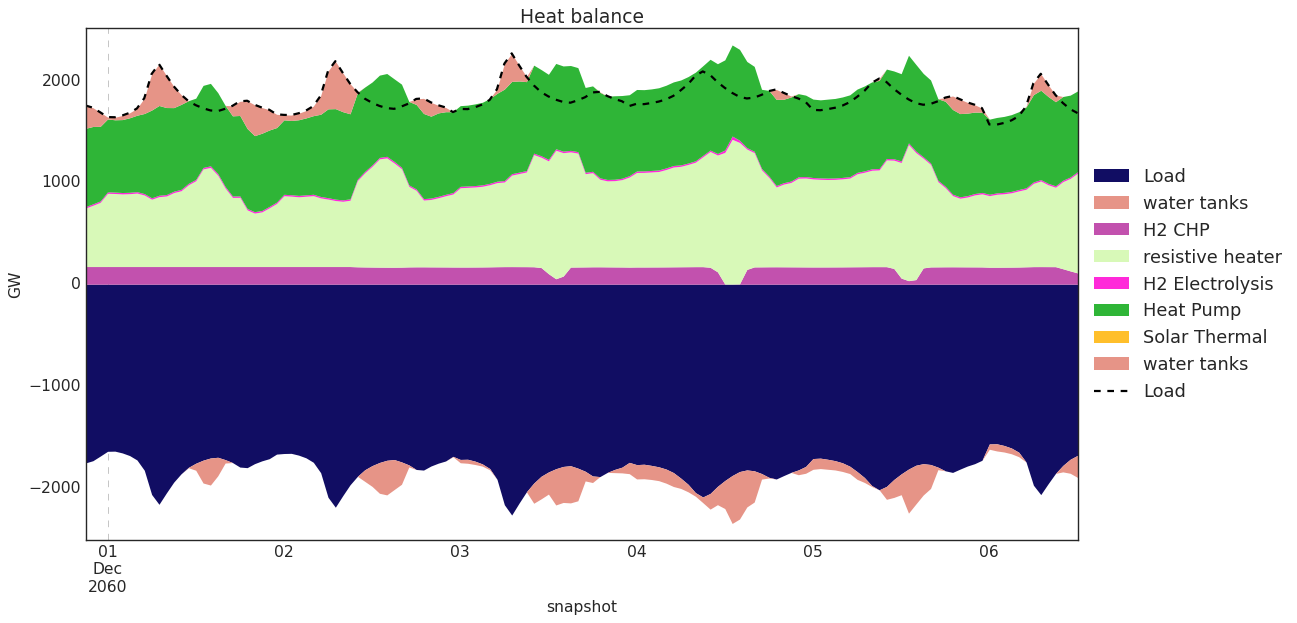

In [ ]:
ax = plot_energy_balance(n, config["plotting"], start_date=f"{PLANNING_YEAR}-11-30 21:00", end_date=f"{PLANNING_YEAR}-12-06 12:00:00", bus_carrier="heat")
ax.set_title("Heat balance")

/home/ivanra/.conda/envs/pypsa-china/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:1798: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(0, None)


Text(0.5, 1.0, 'Heat balance')

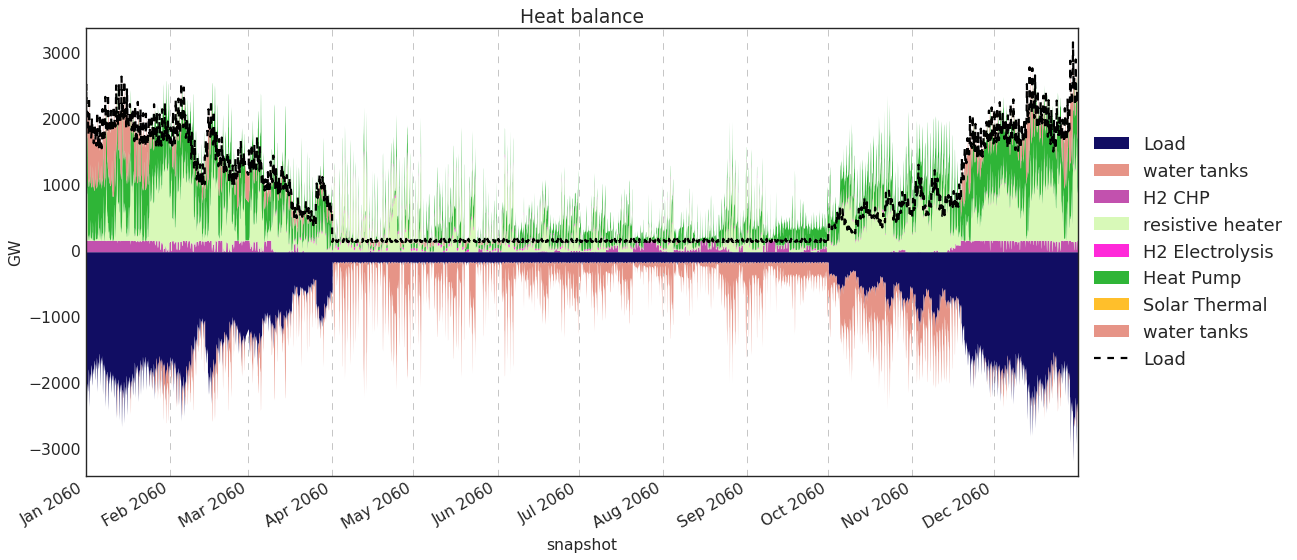

In [ ]:
ax = plot_energy_balance(n, config["plotting"], start_date=f"{PLANNING_YEAR}-01-01 00:00", end_date=f"{PLANNING_YEAR}-12-31 23:00:00", bus_carrier="heat")
ax.set_title("Heat balance")

Text(0, 0.5, 'EnergyDemand / GW')

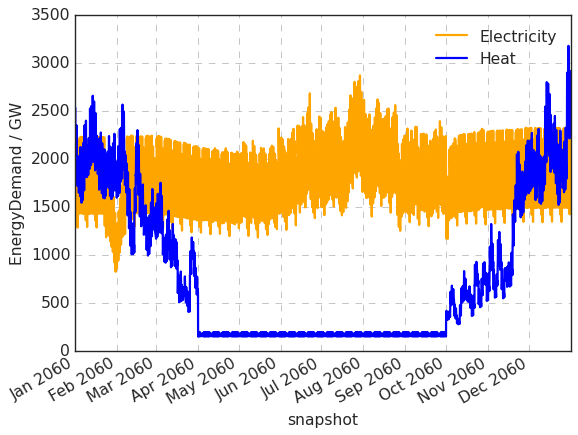

In [ ]:
fix, ax = plt.subplots()
ds_AC = n.statistics.withdrawal(bus_carrier="AC", aggregate_time=False).loc[("Load", "-")]/1e3
ds_heat = n.statistics.withdrawal(bus_carrier="heat", aggregate_time=False).loc[("Load", "-")]/1e3
ds_AC.plot(ax=ax, label="Electricity",  c="orange")
ds_heat.plot(ax=ax, label="Heat", c = "blue")
ax.legend()
ax.set_ylabel("EnergyDemand / GW")

### Plot cap factors time series

In [122]:
capacity_factors = n.statistics.capacity_factor(aggregate_time=False).loc[["Generator"]].droplevel(0).T

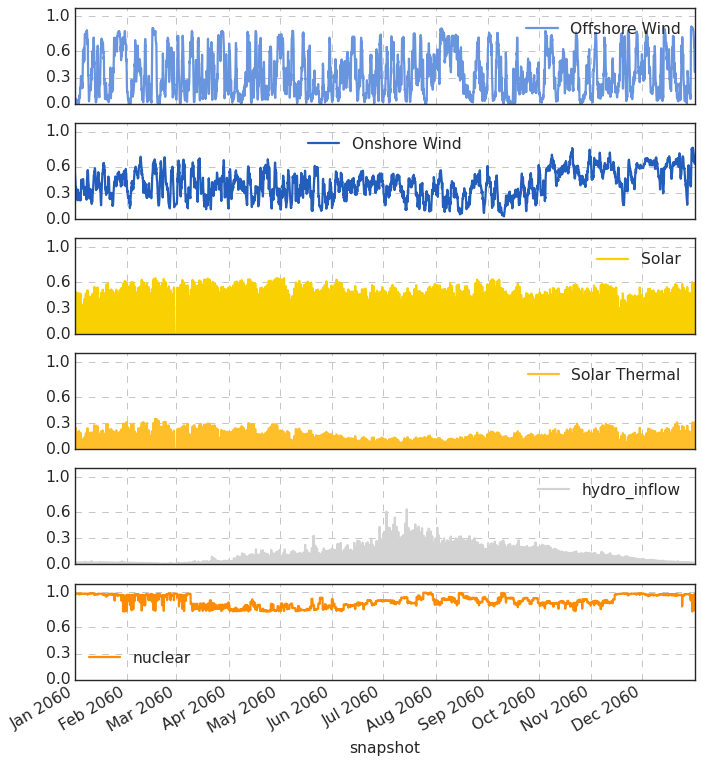

In [123]:
colors_lowered = {k.lower().rstrip():v for k,v in config["plotting"]["tech_colors"].items()}
cap_colors = {k: colors_lowered.get(k.lower().rstrip(), "lightgrey") for k in [c for c in capacity_factors.columns]}
axes = capacity_factors.dropna(axis=1, how="all").fillna(0).plot(subplots=True, figsize=(10,12), color= cap_colors)
for ax in axes:
    ax.set_ylim([0,1.1])
    ax.set_yticks([0,0.3, 0.6,1])

# Pypsa eur

# Plot time series (dev sandbox)

Text(0, 0.5, 'GW')

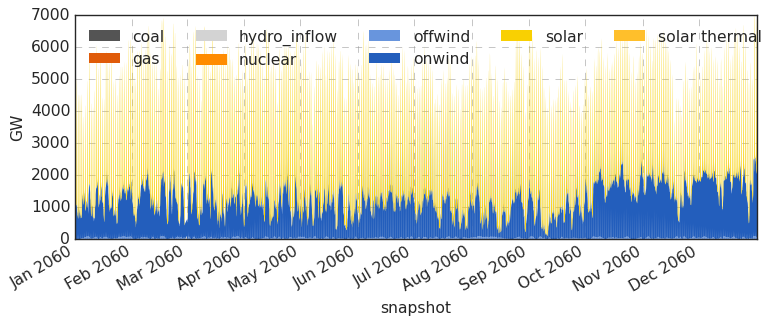

In [124]:
p_by_carrier = n.generators_t.p.T.groupby(n.generators.carrier).sum().T.div(1e3)
fig, ax = plt.subplots(figsize=(11, 4))

p_by_carrier.plot(
    kind="area",
    ax=ax,
    linewidth=0,
    # cmap="tab20b",
    color = p_by_carrier.columns.map(n.carriers.color),
)

ax.legend(ncol=5, loc="upper left", frameon=False)

ax.set_ylabel("GW")

# ax.set_ylim(0, 80);

# COSTS & prices

In [166]:
stores_inflow = n.stores_t.p.sum()
h2_stores= stores_inflow.loc[[c for c in stores_inflow.index if c.find("H2 Store")!=-1]]
h2_stores_inflow = h2_stores.where(h2_stores>0,0).sum()
h2_stores_outflow = h2_stores.where(h2_stores<0,0).sum()

# STATS

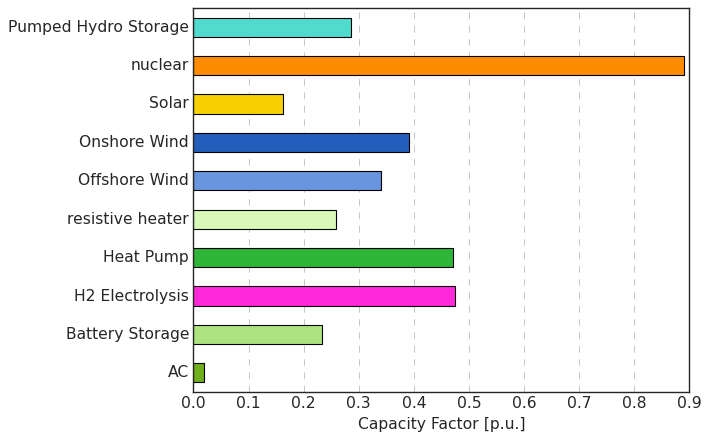

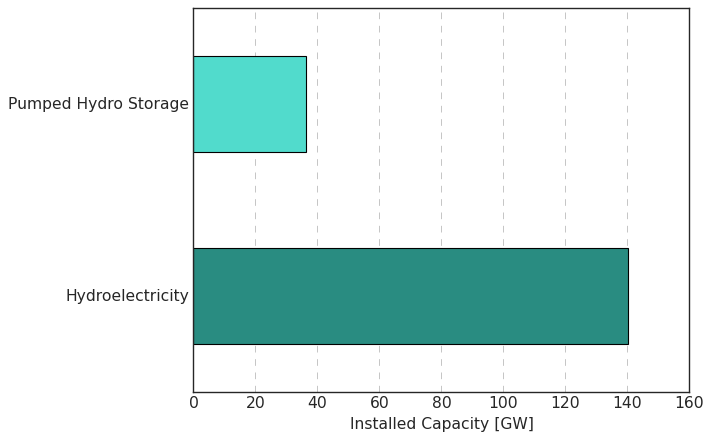

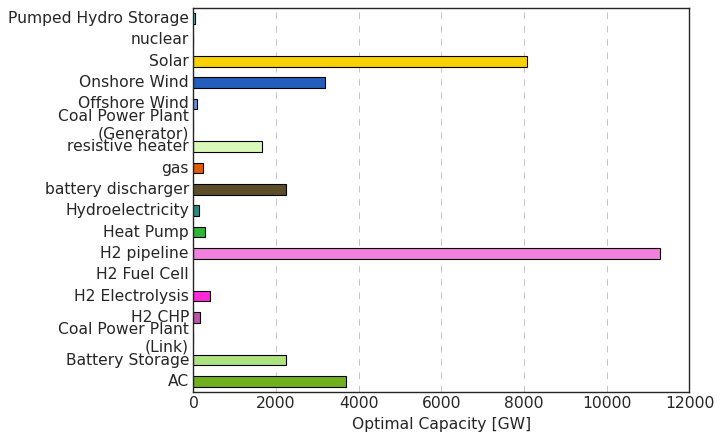

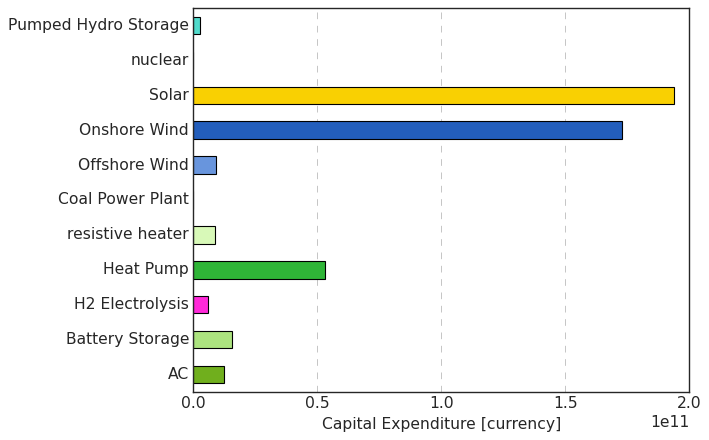

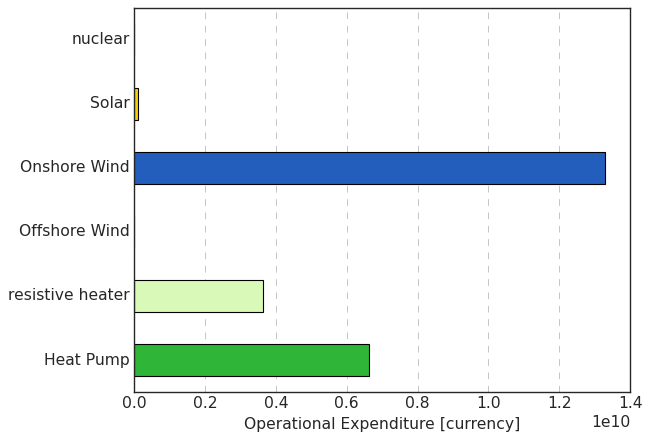

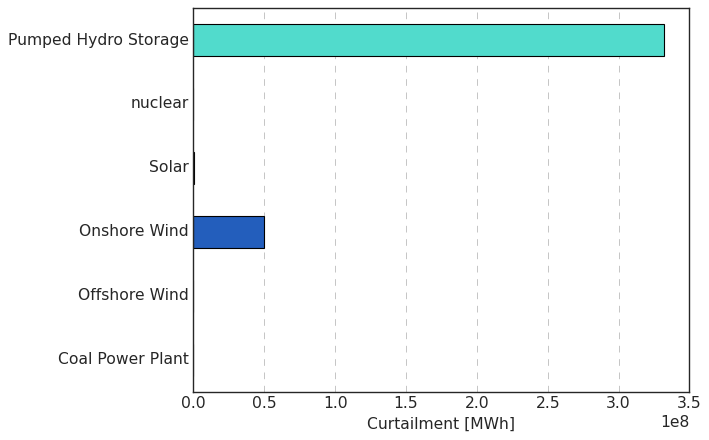

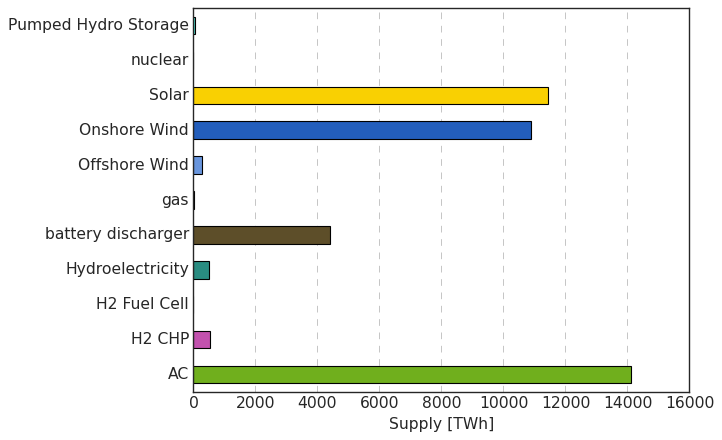

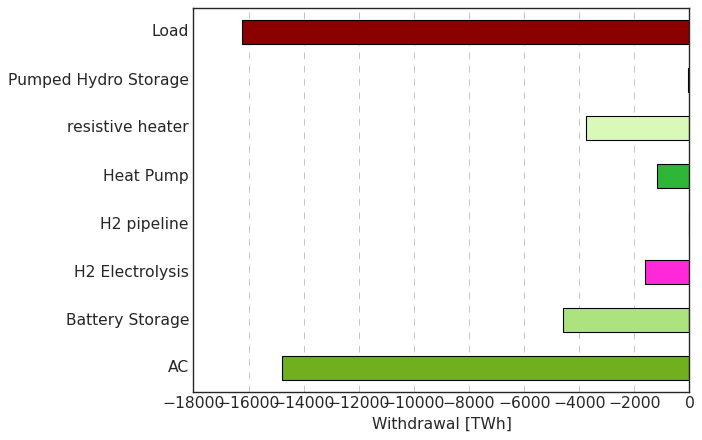

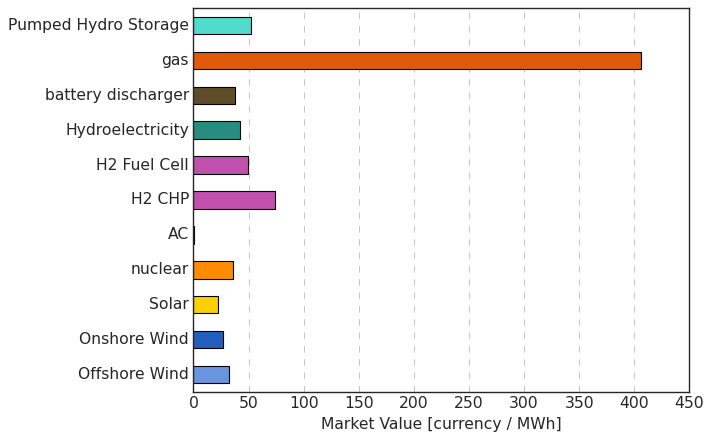

In [167]:
bus_carrier = "AC"
n.loads.carrier = "load"
n.carriers.loc["load", ["nice_name", "color"]] = "Load", "darkred"
colors = n.carriers.set_index("nice_name").color.where(
    lambda s: s != "", "lightgrey"
)

def rename_index(ds):
    specific = ds.index.map(lambda x: f"{x[1]}\n({x[0]})")
    generic = ds.index.get_level_values("carrier")
    duplicated = generic.duplicated(keep=False)
    index = specific.where(duplicated, generic)
    return ds.set_axis(index)

def plot_static_per_carrier(ds, ax, drop_zero=True):
    if drop_zero:
        ds = ds[ds != 0]
    ds = ds.dropna()
    c = colors[ds.index.get_level_values("carrier")]
    ds = ds.pipe(rename_index)
    label = f"{ds.attrs['name']} [{ds.attrs['unit']}]"
    ds.plot.barh(color=c.values, xlabel=label, ax=ax)
    ax.grid(axis="y")

fig, ax = plt.subplots()
ds = n.statistics.capacity_factor(bus_carrier=bus_carrier).dropna()
plot_static_per_carrier(ds, ax)
plt.show()

fig, ax = plt.subplots()
ds = n.statistics.installed_capacity(bus_carrier=bus_carrier).dropna()
if "Line" in ds.index:
    ds = ds.drop("Line")
ds = ds.drop(("Generator", "Load"), errors="ignore")
ds = ds / 1e3
ds.attrs["unit"] = "GW"
plot_static_per_carrier(ds.abs(), ax)
plt.show()

fig, ax = plt.subplots()
ds = n.statistics.optimal_capacity(bus_carrier=bus_carrier)
if "Line" in ds.index:
    ds = ds.drop("Line")
ds = ds.drop(("Generator", "Load"), errors="ignore")
ds = ds.abs() / 1e3
ds.attrs["unit"] = "GW"
plot_static_per_carrier(ds, ax)
plt.show()

fig, ax = plt.subplots()
ds = n.statistics.capex(bus_carrier=bus_carrier)
plot_static_per_carrier(ds, ax)
plt.show()

fig, ax = plt.subplots()
ds = n.statistics.opex(bus_carrier=bus_carrier)
plot_static_per_carrier(ds, ax)
plt.show()

fig, ax = plt.subplots()
ds = n.statistics.curtailment(bus_carrier=bus_carrier)
plot_static_per_carrier(ds, ax)
plt.show()

fig, ax = plt.subplots()
ds = n.statistics.supply(bus_carrier=bus_carrier)
if "Line" in ds.index:
    ds = ds.drop("Line")
ds = ds / 1e6
ds.attrs["unit"] = "TWh"
plot_static_per_carrier(ds, ax)
plt.show()

fig, ax = plt.subplots()
ds = n.statistics.withdrawal(bus_carrier=bus_carrier)
if "Line" in ds.index:
    ds = ds.drop("Line")
ds = ds / -1e6
ds.attrs["unit"] = "TWh"
plot_static_per_carrier(ds, ax)
plt.show()

fig, ax = plt.subplots()
ds = n.statistics.market_value(bus_carrier=bus_carrier)
plot_static_per_carrier(ds, ax)
plt.show()

In [168]:
n.buses

,v_nom,type,x,y,carrier,unit,v_mag_pu_set,v_mag_pu_min,v_mag_pu_max,control,generator,sub_network,location
Bus,,,,,,,,,,,,,
Anhui,1.0,,117.231214,31.796579,AC,,1.0,0.0,inf,PQ,,,Anhui
Beijing,1.0,,116.405232,40.171602,AC,,1.0,0.0,inf,PQ,,,Beijing
Chongqing,1.0,,107.854783,30.041861,AC,,1.0,0.0,inf,PQ,,,Chongqing
Fujian,1.0,,117.967146,26.064535,AC,,1.0,0.0,inf,PQ,,,Fujian
Gansu,1.0,,101.043962,37.694414,AC,,1.0,0.0,inf,PQ,,,Gansu
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Tianjin battery,1.0,,117.317074,39.292560,battery,,1.0,0.0,inf,PQ,,,Tianjin
Tibet battery,1.0,,88.163340,31.620638,battery,,1.0,0.0,inf,PQ,,,Tibet
Xinjiang battery,1.0,,85.089587,40.855665,battery,,1.0,0.0,inf,PQ,,,Xinjiang


In [169]:
n.statistics.market_value()

component    carrier             
Generator    Offshore Wind            32.188480
             Onshore Wind             26.687670
             Solar                    22.550977
             Solar Thermal            14.507071
             hydro_inflow             16.607165
             nuclear                  35.601823
Link         AC                        0.885344
             Battery Storage           3.415052
             H2 CHP                   22.090016
             H2 Electrolysis           4.351415
             H2 Fuel Cell              4.529816
             H2 pipeline               0.559040
             Heat Pump                16.145263
             Hydroelectricity         16.032865
             Sabatier                 61.983208
             battery discharger        0.039496
             gas                     219.502624
             resistive heater          3.355298
             stations                 -0.089663
             water tanks              -0.001502
Load  

In [170]:
n.statistics.market_value(bus_carrier="AC")

component    carrier             
Generator    Offshore Wind            32.188480
             Onshore Wind             26.687670
             Solar                    22.550977
             nuclear                  35.601823
Link         AC                        0.885344
             Battery Storage                NaN
             H2 CHP                   74.099809
             H2 Electrolysis                NaN
             H2 Fuel Cell             49.551587
             H2 pipeline                    NaN
             Heat Pump                      NaN
             Hydroelectricity         42.469728
             battery discharger       38.123325
             gas                     406.017342
             resistive heater               NaN
Load         Load                           NaN
StorageUnit  Pumped Hydro Storage     52.113677
dtype: float64

In [171]:
n.statistics.market_value(groupby=pypsa.statistics.get_carrier_and_bus_carrier)

component    carrier               bus_carrier    
Generator    Offshore Wind         AC                  32.188480
             Onshore Wind          AC                  26.687670
             Solar                 AC                  22.550977
             Solar Thermal         heat                14.507071
             hydro_inflow          stations            16.607165
             nuclear               AC                  35.601823
Link         AC                    AC                   0.885344
             Battery Storage       AC                        NaN
                                   Battery Storage     26.437024
             H2 CHP                AC                  74.099809
                                   H2                        NaN
                                   heat                48.894171
             H2 Electrolysis       AC                        NaN
                                   H2                  13.777565
                                   heat

In [172]:
n.statistics.market_value(groupby=pypsa.statistics.get_carrier_and_bus_carrier, bus_carrier="AC")

component    carrier               bus_carrier
Generator    Offshore Wind         AC              32.188480
             Onshore Wind          AC              26.687670
             Solar                 AC              22.550977
             nuclear               AC              35.601823
Link         AC                    AC               0.885344
             Battery Storage       AC                    NaN
             H2 CHP                AC              74.099809
             H2 Electrolysis       AC                    NaN
             H2 Fuel Cell          AC              49.551587
             H2 pipeline           AC                    NaN
             Heat Pump             AC                    NaN
             Hydroelectricity      AC              42.469728
             battery discharger    AC              38.123325
             gas                   AC             406.017342
             resistive heater      AC                    NaN
Load         Load                  AC 

In [173]:
n.statistics.supply()

component    carrier             
Store        Battery Storage         4.483127e+09
             H2                      1.403964e+09
             gas                     6.633386e+07
             stations                3.651662e+08
             water tanks             1.153614e+09
Link         AC                      1.410229e+10
             Battery Storage         4.484803e+09
             H2 CHP                  9.859631e+08
             H2 Electrolysis         1.340652e+09
             H2 Fuel Cell            5.811008e+04
             H2 pipeline             2.659225e+09
             Heat Pump               3.699124e+09
             Hydroelectricity        7.884092e+08
             Sabatier                6.819289e+07
             battery discharger      4.394191e+09
             gas                     2.945489e+07
             resistive heater        3.712553e+09
             stations                1.998331e+07
             water tanks             3.034504e+09
Generator    Off

# brownfield

In [174]:
ds = n.statistics.installed_capacity(bus_carrier=bus_carrier).dropna()

ds = ds[ds != 0]
ds = ds.dropna()
c = colors[ds.index.get_level_values("carrier")]
# ds = ds.pipe(rename_index)
# label = f"{ds.attrs['name']} [{ds.attrs['unit']}]"
# ds.plot.barh(color=c.values, xlabel=label, ax=ax)
# ax.grid(axis="y")
ds

component    carrier             
Link         Hydroelectricity        140322.0
StorageUnit  Pumped Hydro Storage     36390.0
dtype: float64

# Network topology
irrelevant as don't have lines

In [175]:
n.determine_network_topology()
n.sub_networks["n_branches"] = [
    len(sn.branches()) for sn in n.sub_networks.obj
]
n.sub_networks["n_buses"] = [len(sn.buses()) for sn in n.sub_networks.obj]

n.sub_networks



,carrier,slack_bus,obj,n_branches,n_buses
SubNetwork,,,,,
0,AC,Anhui,<pypsa.components.SubNetwork object at 0x7f345...,0,1
1,AC,Beijing,<pypsa.components.SubNetwork object at 0x7f345...,0,1
2,AC,Chongqing,<pypsa.components.SubNetwork object at 0x7f345...,0,1
3,AC,Fujian,<pypsa.components.SubNetwork object at 0x7f345...,0,1
4,AC,Gansu,<pypsa.components.SubNetwork object at 0x7f345...,0,1
...,...,...,...,...,...
379,battery,Tianjin battery,<pypsa.components.SubNetwork object at 0x7f345...,0,1
380,battery,Tibet battery,<pypsa.components.SubNetwork object at 0x7f345...,0,1
381,battery,Xinjiang battery,<pypsa.components.SubNetwork object at 0x7f345...,0,1


# EXAMPLES